In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np

# Importing train test split
from sklearn.model_selection import train_test_split

# Importing classifiers
from sklearn.tree import DecisionTreeClassifier  
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Importing F1 score
from sklearn.metrics import f1_score

# Impoting data visualisation library.
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reding the csv file
quotes = pd.read_csv('Pricing_modeling.csv')

In [3]:
# Checking the contents of the file by printing head of the data.
quotes.head()

,QuoteRef,CampaignCode,Product1,Product1Desc,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,...,BF (Household composition at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),WRB (Finance Group - CCJs),LSB (Regional banded house price band),GSB (Tenure band),UDB (Searches detected),BB (Number of CCJs),ND (Months since last CCJ)
0,25D72A5D-E8F8-4FB4-ADB4-AF0CE2B675D4,BS9R,LFAS,Level life,N,N,51,5,19.05,279.75,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
1,BEDEC272-E396-4671-B65A-26DC376D11B4,BS9R,LFAS,Level life,N,N,51,5,11.48,134.20,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
2,BEDEC272-E396-4671-B65A-26DC376D11B4,BS9R,LFAS,Level life,N,N,51,5,11.48,134.20,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
3,BEDEC272-E396-4671-B65A-26DC376D11B4,BS9R,LFAS,Level life,N,N,51,5,11.48,134.20,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
4,0BED1165-4AF0-432C-BCF6-8398EFCA9637,BS09,LFAS,Level life,N,N,34,26,36.22,1116.22,...,G,-999997.0,17,7,6,5.0,12.0,NaN,-999997.0,NaN


# EDA

In [4]:
# Checking count of 'QuoteRef' values.
quotes.QuoteRef.value_counts()

C68F12B5-B908-472F-B7E8-792835E338F6    87
4A43B31D-8048-4E2E-86F0-B9125027119E    86
77CF2466-6372-4C7E-AC9F-F2B6F1044F17    28
738F961A-79CB-49D6-B4DD-50B5226EDD3F    23
0DA3AB73-D745-4A70-BF81-16580608BE5F    22
                                        ..
3994ED7C-0AE3-44E6-8754-C1FC5E4BD45F     1
2F2589FB-2FD7-40A2-89FB-2BC9864866DB     1
86E9ED62-B12F-4776-8F92-26DAA49CAEFB     1
E26FA224-DB03-4FC0-8B45-0742BA8620DD     1
35134FE3-7051-46B0-8C7A-89B49E1FF993     1
Name: QuoteRef, Length: 26226, dtype: int64

In [5]:
# Checking unique values inside 'QuoteRef'
quotes.QuoteRef.nunique()

26226

In [6]:
# Checking how big is the dataset
quotes.shape

(35978, 26)

In [7]:
# Cheking 'Product1' value count
quotes.Product1.value_counts()

LFAS            22509
LFBSB            4698
LFASB            4697
LFBS             4074
Name: Product1, dtype: int64

In [8]:
# Checking 'Product1Desc' value count
quotes.Product1Desc.value_counts()

Level life                                                  22509
Decreasing accelerated critical illness without child CI     4698
Decreasing life                                              4697
Level accelerated critical illness without child CI          4074
Name: Product1Desc, dtype: int64

In [9]:
# Removing 'QuoteRef' and 'Product1Desc'
quotes_ref_removed = quotes.drop(columns = ['QuoteRef', 'Product1Desc'], axis =1)

In [10]:
# Making a copy of the dataset.
quotes_converted = quotes_ref_removed.copy()

In [11]:
# Converting 'Y/N' column to '1/0'
quotes_converted['Person1 smoker'] = quotes_ref_removed['Person1 smoker'].apply(lambda x: 1 if x=='Y' else 0)
quotes_converted['Joint?'] = quotes_ref_removed['Joint?'].apply(lambda x: 1 if x=='Y' else 0)
quotes_converted['Sale'] = quotes_ref_removed['Sale'].apply(lambda x: 1 if x=='Y' else 0)

In [12]:
# Checking the data.
quotes_converted.head()

,CampaignCode,Product1,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,Sale,JF (Score),...,BF (Household composition at current address),EF (No. of people not same surname at current address),NOB (Property group),URB (Income group),WRB (Finance Group - CCJs),LSB (Regional banded house price band),GSB (Tenure band),UDB (Searches detected),BB (Number of CCJs),ND (Months since last CCJ)
0,BS9R,LFAS,0,0,51,5,19.05,279.75,0,599,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
1,BS9R,LFAS,0,0,51,5,11.48,134.20,1,599,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
2,BS9R,LFAS,0,0,51,5,11.48,134.20,1,599,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
3,BS9R,LFAS,0,0,51,5,11.48,134.20,1,599,...,B,5.0,13,4,1,5.0,2.0,0.0,0.0,-999997.0
4,BS09,LFAS,0,0,34,26,36.22,1116.22,0,477,...,G,-999997.0,17,7,6,5.0,12.0,NaN,-999997.0,NaN


## Correlation

In [13]:
# Rearraging the columns.
quotes_rearranged = quotes_converted[[c for c in quotes_converted if c not in ['Sale']] + ['Sale']]
print(quotes_rearranged.head())

  CampaignCode      Product1  Person1 smoker  Joint?  Person1 Age  Term  \
0      BS9R     LFAS                       0       0           51     5   
1      BS9R     LFAS                       0       0           51     5   
2      BS9R     LFAS                       0       0           51     5   
3      BS9R     LFAS                       0       0           51     5   
4      BS09     LFAS                       0       0           34    26   

   TotalPremium  GrossCommission  JF (Score) GC (Match Status)  ...  \
0         19.05           279.75         599                I1  ...   
1         11.48           134.20         599                I1  ...   
2         11.48           134.20         599                I1  ...   
3         11.48           134.20         599                I1  ...   
4         36.22          1116.22         477                S1  ...   

   EF (No. of people not same surname at current address)  \
0                                                5.0        


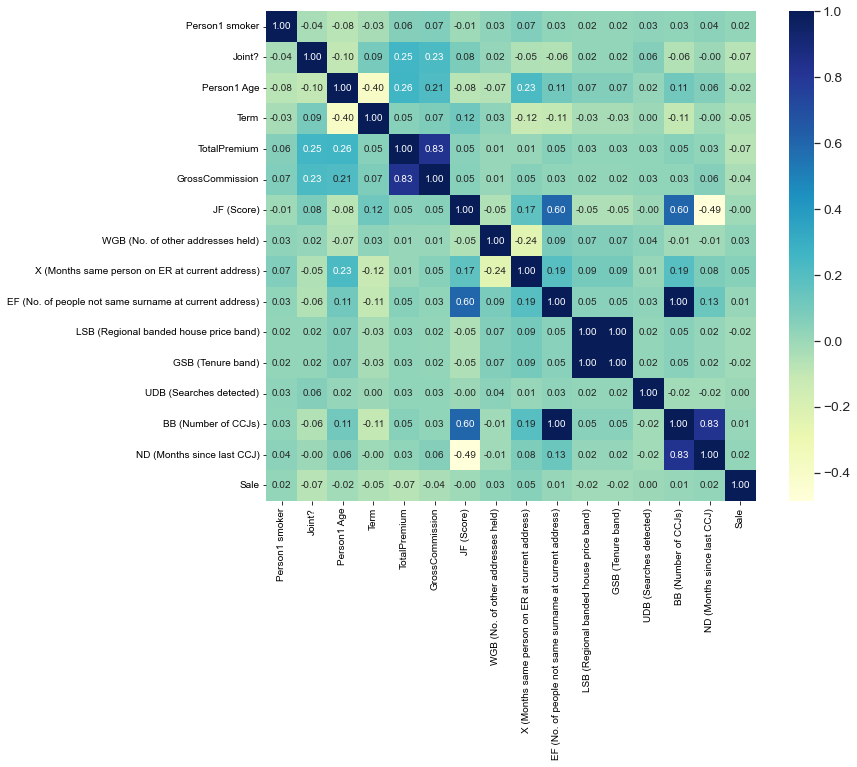

In [14]:
# Ploting the correlation graph.
correlation_matrix = quotes_rearranged.corr()
plt.subplots(figsize=(12, 9))
sns.set(font_scale=1.25)
heat_map = sns.heatmap(correlation_matrix, annot=True, square=True, cbar=True, fmt='.2f', annot_kws={'size': 10}, cmap='YlGnBu')
plt.show()

By correlation plot 'GSB (Tenure band)’ and ‘LSB (Regional banded house price band)’ columns highly correlate with each other. Can remove one of the column and retain the other.

‘BB (Number of CCJs)’ and ‘EF (No. of people not same surname at current address)’ columns highly correlate with each other. Can remove one of the column and retain the other.



In [15]:
# Removing the columns
quotes_improved = quotes_rearranged.drop(columns = ['GSB (Tenure band)', 'EF (No. of people not same surname at current address)'])

In [16]:
# Checking data types.
quotes_improved.dtypes

CampaignCode                                        object
Product1                                            object
Person1 smoker                                       int64
Joint?                                               int64
Person1 Age                                          int64
Term                                                 int64
TotalPremium                                       float64
GrossCommission                                    float64
JF (Score)                                           int64
GC (Match Status)                                   object
WGB (No. of other addresses held)                  float64
W (Level ER match current address)                  object
X (Months same person on ER at current address)    float64
BF (Household composition at current address)       object
NOB (Property group)                                object
URB (Income group)                                  object
WRB (Finance Group - CCJs)                          obje

## Missing values

In [17]:
# Calculating missing percentage in the data.
missing_values = quotes_improved.isnull().sum()

# Calculating missing percentage 
missing_data_persentage = ( quotes_improved.isnull().sum() / len(quotes_improved) ) * 100
missing_data = pd.concat([missing_values, missing_data_persentage], axis=1, keys=['Missing values total', 'Missing persentage'])

# Getting only missing data
missing_data = missing_data[missing_data['Missing persentage'] != 0].sort_values('Missing persentage', ascending=False)

# Abserving the missing data
missing_data

,Missing values total,Missing persentage
WGB (No. of other addresses held),7479,20.787704
UDB (Searches detected),7479,20.787704
ND (Months since last CCJ),7479,20.787704
W (Level ER match current address),5912,16.432264
X (Months same person on ER at current address),5912,16.432264
BF (Household composition at current address),5912,16.432264
NOB (Property group),5912,16.432264
URB (Income group),5912,16.432264
WRB (Finance Group - CCJs),5912,16.432264
LSB (Regional banded house price band),5912,16.432264


Text(0.5, 1.0, 'Percentage of missing data by feature')

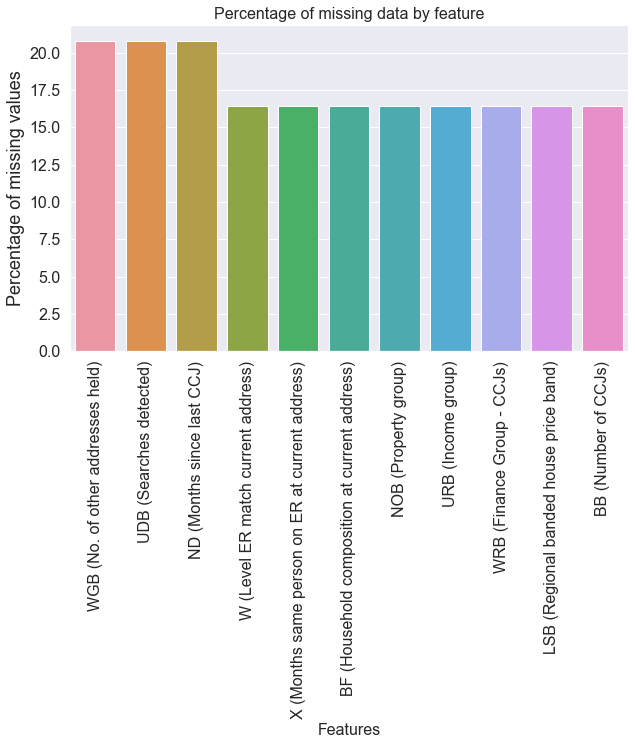

In [18]:
# Plotting missing data.
plt.subplots(figsize=(10, 6))
plt.xticks(rotation='90', fontsize=16)
plt.yticks(fontsize=16)
sns.barplot(x=missing_data.index, y=missing_data['Missing persentage'])
plt.xlabel('Features', fontsize=16)
plt.ylabel('Percentage of missing values', fontsize=18)
plt.title('Percentage of missing data by feature', fontsize=16)

## Feature Engineering

In [19]:
# Checking value counts of 'Person1 Age'
quotes_improved['Person1 Age'].value_counts()

28    2625
34    2568
37    2137
36    2013
33    1966
31    1926
30    1820
40    1802
32    1659
35    1619
27    1407
29    1286
39    1198
26    1046
44    1018
41     988
25     957
45     929
38     916
42     887
46     655
47     627
43     602
24     563
23     472
50     463
49     339
48     325
22     206
53     189
51     185
21     149
52      98
55      90
19      71
54      45
56      41
20      25
60      24
57      17
58      17
63       3
65       2
61       2
62       1
Name: Person1 Age, dtype: int64

In [20]:
# Checking value counts of 'Term'
quotes_improved['Term'].value_counts()

25    7552
20    4417
30    3938
5     2918
35    2647
15    2279
10    1872
40    1548
18    1112
29     915
23     797
22     561
24     547
34     512
28     419
17     415
27     378
21     357
32     321
33     318
16     299
19     282
13     203
26     201
31     174
12     168
7      113
8      109
14     106
36     102
6      100
39      93
37      73
38      70
11      45
9       17
Name: Term, dtype: int64

In [21]:
# Checking value counts of 'TotalPremium'
quotes_improved['TotalPremium'].value_counts()

9.93      73
10.00     72
54.42     66
35.72     63
12.72     59
          ..
115.47     1
37.75      1
52.73      1
3.57       1
492.40     1
Name: TotalPremium, Length: 6000, dtype: int64

In [22]:
# Checking value counts of 'JF (Score)'
quotes_improved['JF (Score)'].value_counts()

9999    5912
562     1253
560     1094
549      918
548      873
        ... 
505        3
597        3
461        2
456        2
458        1
Name: JF (Score), Length: 146, dtype: int64

In [23]:
# Replacing 9999 by mode
quotes_improved['JF (Score)'] = quotes_improved['JF (Score)'].replace(9999, 562)

In [24]:
# Checking value counts of 'GC (Match Status)'
quotes_improved['GC (Match Status)'].value_counts()

I1    28499
NM     5912
S1     1218
H1      349
Name: GC (Match Status), dtype: int64

In [25]:
# Checking value counts of 'WGB (No. of other addresses held)'
quotes_improved['WGB (No. of other addresses held)'].value_counts()

3.0     6551
0.0     5612
1.0     4771
2.0     4737
4.0     2183
5.0     2156
6.0      717
7.0      577
8.0      430
9.0      384
11.0     160
12.0     102
10.0      73
16.0      46
Name: WGB (No. of other addresses held), dtype: int64

In [26]:
# Replacing null values by 0
quotes_improved['WGB (No. of other addresses held)'] = quotes_improved['WGB (No. of other addresses held)'].fillna(0)
quotes_improved['WGB (No. of other addresses held)'].value_counts()

0.0     13091
3.0      6551
1.0      4771
2.0      4737
4.0      2183
5.0      2156
6.0       717
7.0       577
8.0       430
9.0       384
11.0      160
12.0      102
10.0       73
16.0       46
Name: WGB (No. of other addresses held), dtype: int64

In [27]:
# Checking value counts of 'W (Level ER match current address)'
quotes_improved['W (Level ER match current address)'].value_counts()
  

N2    10496
P1     7177
N1     4204
P2     4057
ZZ     1826
P3      817
S2      693
S1      524
S3      125
P4       86
N4       42
N3       19
Name: W (Level ER match current address), dtype: int64

In [28]:
quotes_improved['W (Level ER match current address)'].isna().sum()

5912

In [29]:
# Replacing null values by 'NA'
quotes_improved['W (Level ER match current address)'] = quotes_improved['W (Level ER match current address)'].fillna('NA')
quotes_improved['W (Level ER match current address)'].value_counts()

N2    10496
P1     7177
NA     5912
N1     4204
P2     4057
ZZ     1826
P3      817
S2      693
S1      524
S3      125
P4       86
N4       42
N3       19
Name: W (Level ER match current address), dtype: int64

In [30]:
# Checking value counts of 'X (Months same person on ER at current address)'
quotes_improved['X (Months same person on ER at current address)'].value_counts()

-999997.0    17929
 21.0         1999
 49.0          899
 37.0          760
 16.0          669
             ...  
 63.0            2
 75.0            2
 82.0            2
 312.0           1
 47.0            1
Name: X (Months same person on ER at current address), Length: 120, dtype: int64

In [31]:
# Replacing null and -999997.0 values by 0.
quotes_improved['X (Months same person on ER at current address)'] = quotes_improved['X (Months same person on ER at current address)'].fillna(0)
quotes_improved['X (Months same person on ER at current address)'] = quotes_improved['X (Months same person on ER at current address)'].replace(-999997.0, 0)
quotes_improved['X (Months same person on ER at current address)'].value_counts()

0.0      23841
21.0      1999
49.0       899
37.0       760
16.0       669
         ...  
63.0         2
75.0         2
82.0         2
312.0        1
47.0         1
Name: X (Months same person on ER at current address), Length: 120, dtype: int64

In [32]:
# Checking value counts of 'BF (Household composition at current address)'
quotes_improved['BF (Household composition at current address)'].value_counts()

H    16198
G     4623
B     3661
C     2144
A     1784
E     1080
D      435
F      141
Name: BF (Household composition at current address), dtype: int64

In [33]:
# Replacing null values by most ocuring value.
quotes_improved['BF (Household composition at current address)'] = quotes_improved['BF (Household composition at current address)'].fillna('H')
quotes_improved['BF (Household composition at current address)'].value_counts()

H    22110
G     4623
B     3661
C     2144
A     1784
E     1080
D      435
F      141
Name: BF (Household composition at current address), dtype: int64

In [34]:
# Checking value counts of 'NOB (Property group)'
quotes_improved['NOB (Property group)'].value_counts()

11      3299
13      2167
12      1841
16      1489
7       1482
18      1466
20      1453
14      1448
15      1409
9       1328
21      1280
8       1271
10      1238
17      1231
24      1165
19      1072
22      1061
{ND}    1029
6        941
23       885
3        530
5        410
2        226
4        182
1        109
XX        54
Name: NOB (Property group), dtype: int64

In [35]:
# Replacing null, {ND} and XX values by most frequent value.
quotes_improved['NOB (Property group)'] = quotes_improved['NOB (Property group)'].fillna('11')
quotes_improved['NOB (Property group)'] = quotes_improved['NOB (Property group)'].replace('{ND}', '11')
quotes_improved['NOB (Property group)'] = quotes_improved['NOB (Property group)'].replace('XX', '11')
quotes_improved['NOB (Property group)'].value_counts()

11    10294
13     2167
12     1841
16     1489
7      1482
18     1466
20     1453
14     1448
15     1409
9      1328
21     1280
8      1271
10     1238
17     1231
24     1165
19     1072
22     1061
6       941
23      885
3       530
5       410
2       226
4       182
1       109
Name: NOB (Property group), dtype: int64

In [36]:
# Checking value counts of 'URB (Income group)'
quotes_improved['URB (Income group)'].value_counts()

6       6110
4       6045
5       5276
3       4879
7       4427
2       1261
8       1131
{ND}     488
1        395
X         54
Name: URB (Income group), dtype: int64

In [37]:
## Replacing null, {ND} and X values by most frequent value.
quotes_improved['URB (Income group)'] = quotes_improved['URB (Income group)'].fillna('6')
quotes_improved['URB (Income group)'] = quotes_improved['URB (Income group)'].replace('{ND}', '6')
quotes_improved['URB (Income group)'] = quotes_improved['URB (Income group)'].replace('X', '6')
quotes_improved['URB (Income group)'].value_counts()

6    12564
4     6045
5     5276
3     4879
7     4427
2     1261
8     1131
1      395
Name: URB (Income group), dtype: int64

In [38]:
# Checking value counts of 'WRB (Finance Group - CCJs)'
quotes_improved['WRB (Finance Group - CCJs)'].value_counts()

6       6547
7       5559
5       5463
1       5252
4       3095
3       2201
2       1407
{ND}     488
X         54
Name: WRB (Finance Group - CCJs), dtype: int64

In [39]:
## Replacing null, {ND} and X values by most frequent value
quotes_improved['WRB (Finance Group - CCJs)'] = quotes_improved['WRB (Finance Group - CCJs)'].fillna('6')
quotes_improved['WRB (Finance Group - CCJs)'] = quotes_improved['WRB (Finance Group - CCJs)'].replace('{ND}', '6')
quotes_improved['WRB (Finance Group - CCJs)'] = quotes_improved['WRB (Finance Group - CCJs)'].replace('X', '6')
quotes_improved['WRB (Finance Group - CCJs)'].value_counts()

6    13001
7     5559
5     5463
1     5252
4     3095
3     2201
2     1407
Name: WRB (Finance Group - CCJs), dtype: int64

In [40]:
# Checking value counts of 'LSB (Regional banded house price band)'
quotes_improved['LSB (Regional banded house price band)'].value_counts()

 6.0         4200
 2.0         3617
 7.0         3291
 5.0         3204
 4.0         2853
 3.0         2834
 8.0         2535
 9.0         2488
 10.0        2255
 1.0         1760
 99.0         541
-999997.0     488
Name: LSB (Regional banded house price band), dtype: int64

In [41]:
# Replacing null, 99 and -999997.0 by most occuring value.
quotes_improved['LSB (Regional banded house price band)'] = quotes_improved['LSB (Regional banded house price band)'].fillna(6)
quotes_improved['LSB (Regional banded house price band)'] = quotes_improved['LSB (Regional banded house price band)'].replace(99, 6)
quotes_improved['LSB (Regional banded house price band)'] = quotes_improved['LSB (Regional banded house price band)'].replace(-999997.0, 6)
quotes_improved['LSB (Regional banded house price band)'].value_counts()

6.0     11141
2.0      3617
7.0      3291
5.0      3204
4.0      2853
3.0      2834
8.0      2535
9.0      2488
10.0     2255
1.0      1760
Name: LSB (Regional banded house price band), dtype: int64

In [42]:
# Checking value counts of 'UDB (Searches detected)'
quotes_improved['UDB (Searches detected)'].value_counts()

0.0    27650
1.0      849
Name: UDB (Searches detected), dtype: int64

In [43]:
# Filling null values by 0
quotes_improved['UDB (Searches detected)'] = quotes_improved['UDB (Searches detected)'].fillna(0)
quotes_improved['UDB (Searches detected)'].value_counts()

0.0    35129
1.0      849
Name: UDB (Searches detected), dtype: int64

In [44]:
# Checking value counts of 'BB (Number of CCJs)'
quotes_improved['BB (Number of CCJs)'].value_counts()

 0.0         27842
-999997.0     1567
 1.0           522
 2.0            96
 3.0            23
 6.0             6
 4.0             6
 8.0             4
Name: BB (Number of CCJs), dtype: int64

In [45]:
# Replacing null and -999997.0 by 0
quotes_improved['BB (Number of CCJs)'] = quotes_improved['BB (Number of CCJs)'].fillna(0)
quotes_improved['BB (Number of CCJs)'] = quotes_improved['BB (Number of CCJs)'].replace(-999997.0, 0)
quotes_improved['BB (Number of CCJs)'].value_counts()

0.0    35321
1.0      522
2.0       96
3.0       23
6.0        6
4.0        6
8.0        4
Name: BB (Number of CCJs), dtype: int64

In [46]:
# Checking value counts of 'ND (Months since last CCJ)'
quotes_improved['ND (Months since last CCJ)'].value_counts()

-999997.0    27842
 37.0          139
 46.0           40
 18.0           38
 12.0           37
 8.0            31
 21.0           29
 4.0            22
 5.0            22
 33.0           21
 13.0           21
 14.0           20
 16.0           16
 43.0           16
 20.0           15
 41.0           13
 22.0           12
 6.0            11
 50.0           11
 26.0           11
 36.0           11
 60.0            9
 56.0            9
 65.0            9
 62.0            9
 1.0             7
 59.0            7
 2.0             7
 19.0            7
 54.0            7
 7.0             6
 9.0             6
 23.0            6
 53.0            6
 57.0            6
 28.0            4
 71.0            4
 34.0            4
 63.0            2
 42.0            2
 32.0            2
 17.0            1
 10.0            1
Name: ND (Months since last CCJ), dtype: int64

In [47]:
# Since it has most missing values droping the column
quotes_improved = quotes_improved.drop(columns=['ND (Months since last CCJ)'], axis=1)

In [48]:
quotes_improved.head()

,CampaignCode,Product1,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,JF (Score),GC (Match Status),...,W (Level ER match current address),X (Months same person on ER at current address),BF (Household composition at current address),NOB (Property group),URB (Income group),WRB (Finance Group - CCJs),LSB (Regional banded house price band),UDB (Searches detected),BB (Number of CCJs),Sale
0,BS9R,LFAS,0,0,51,5,19.05,279.75,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,0
1,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
2,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
3,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
4,BS09,LFAS,0,0,34,26,36.22,1116.22,477,S1,...,S2,0.0,G,17,7,6,5.0,0.0,0.0,0


##  Scatterplot

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


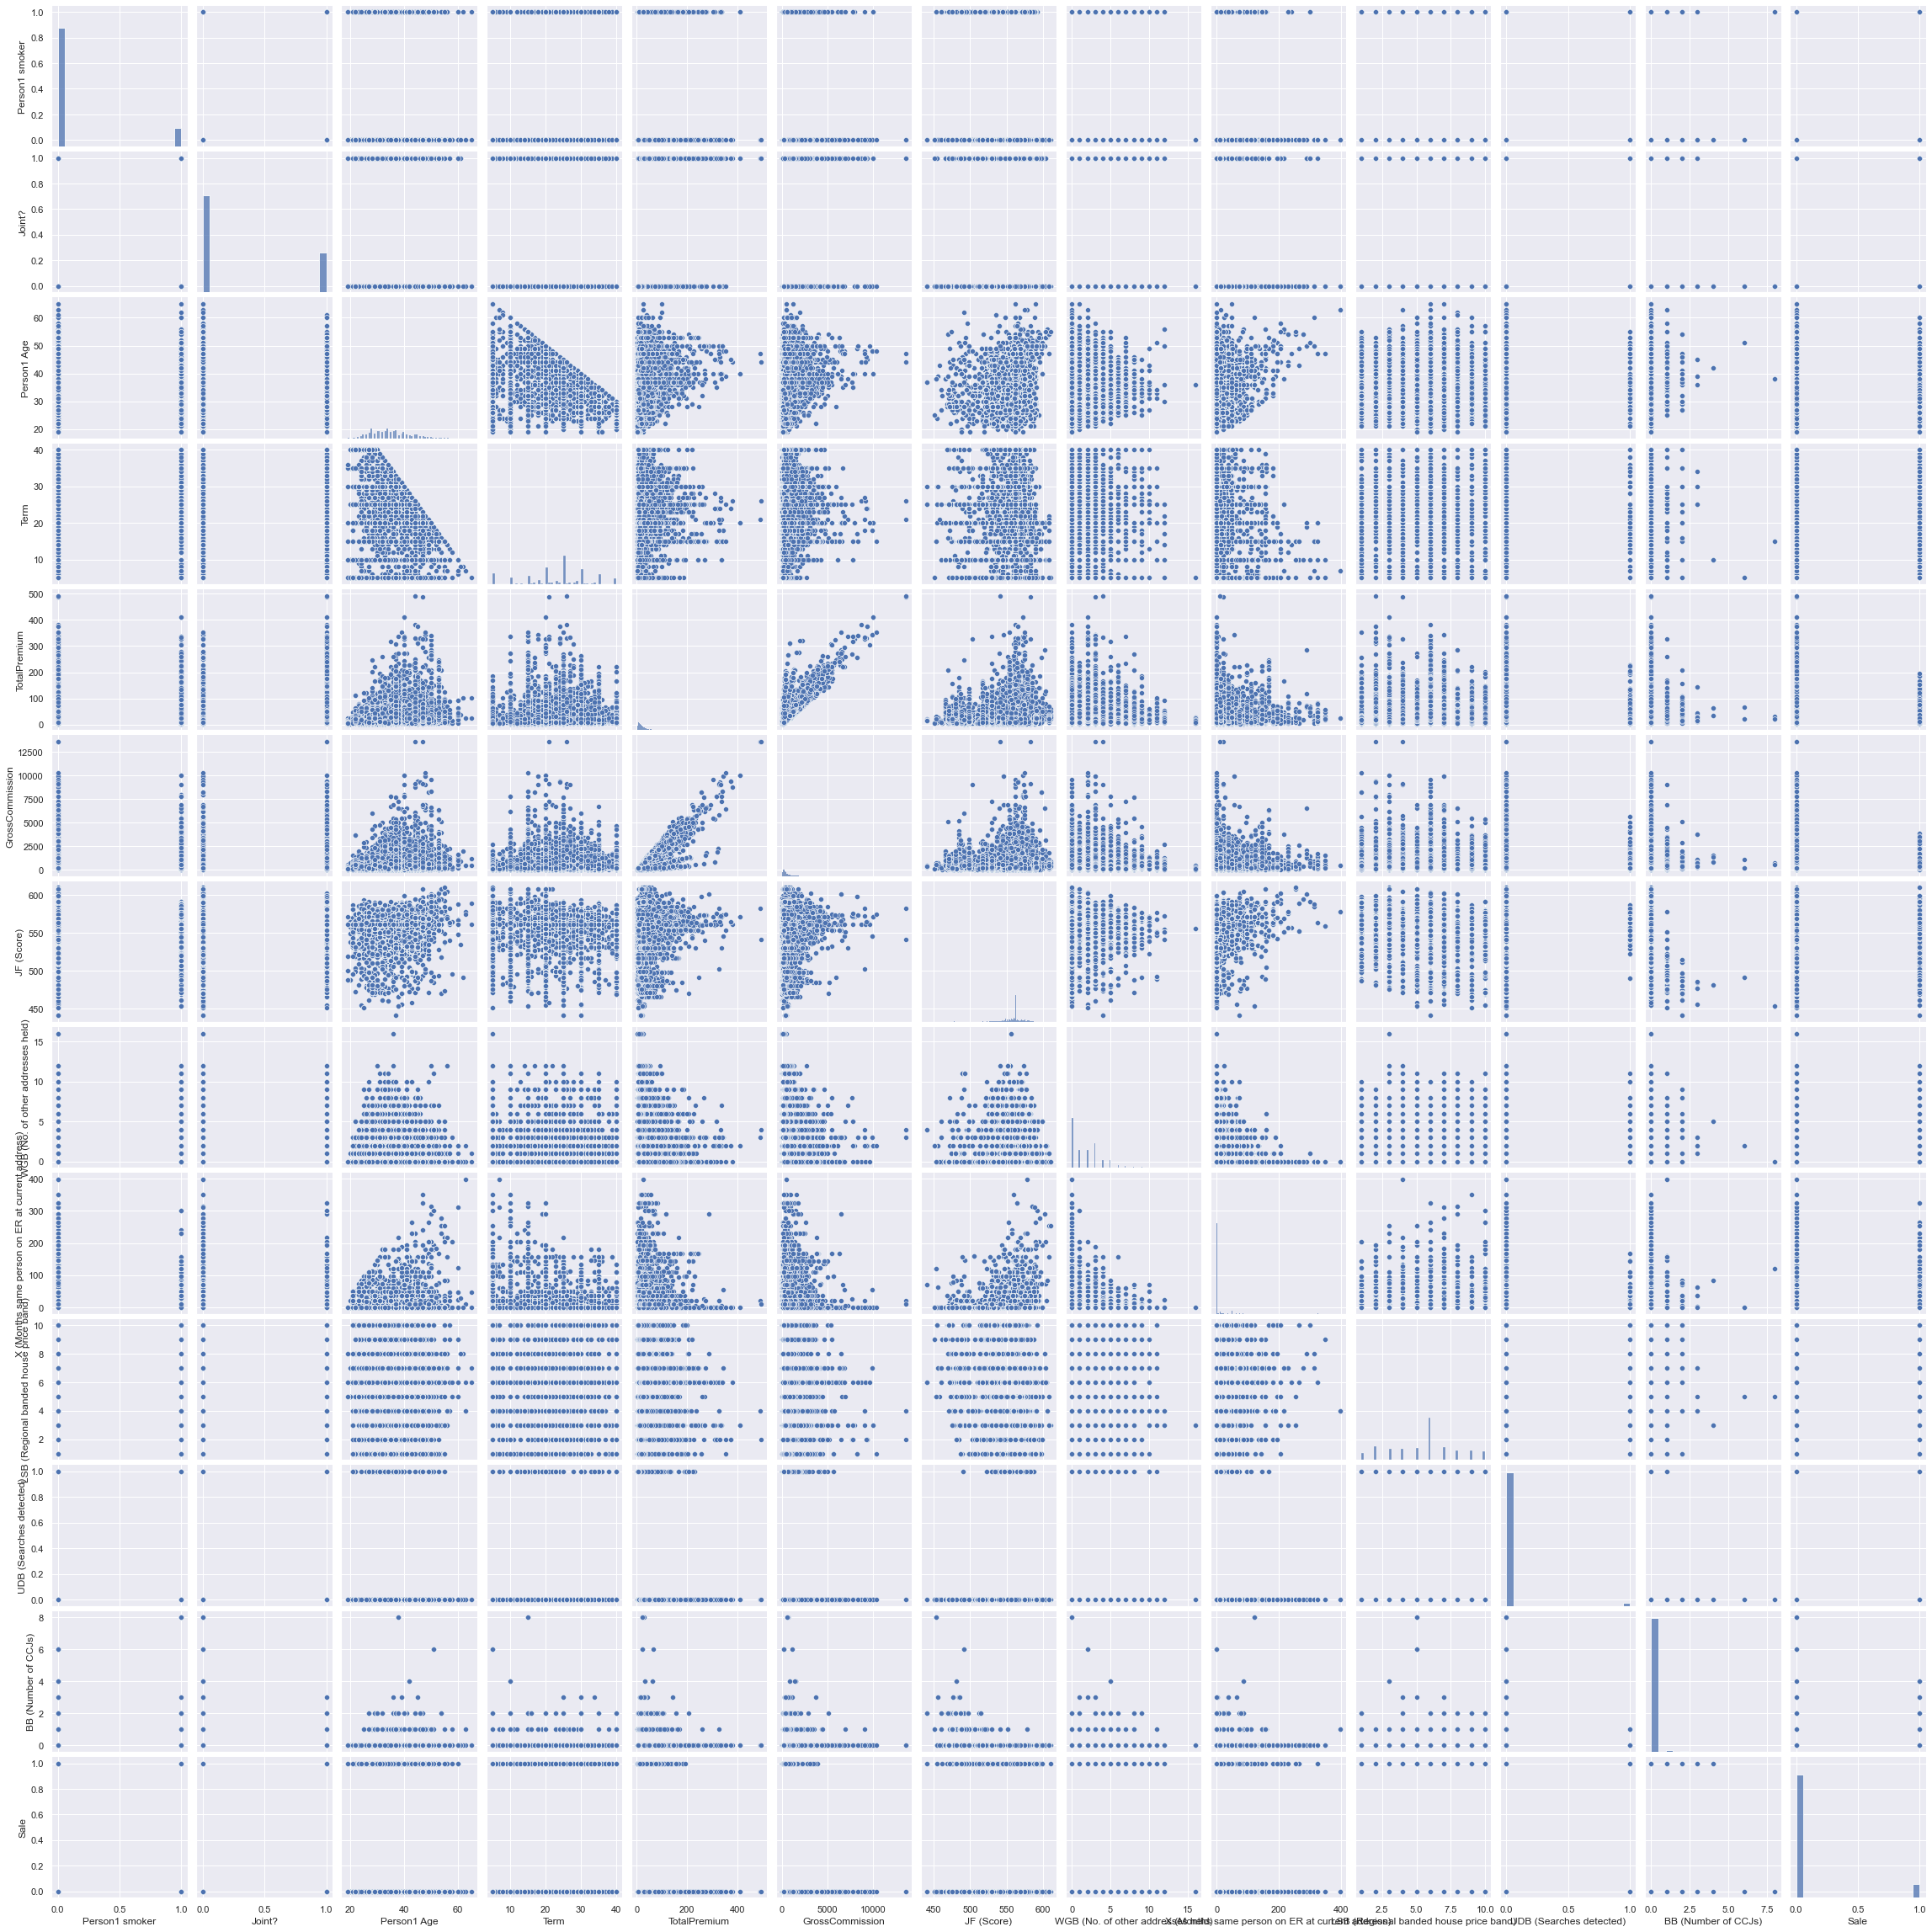

In [49]:
# Scatter plot
sns.set()
features_scatterplot = quotes_improved.select_dtypes(include=np.number).columns.tolist()
sns.pairplot(quotes_improved[features_scatterplot], size = 2.5)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


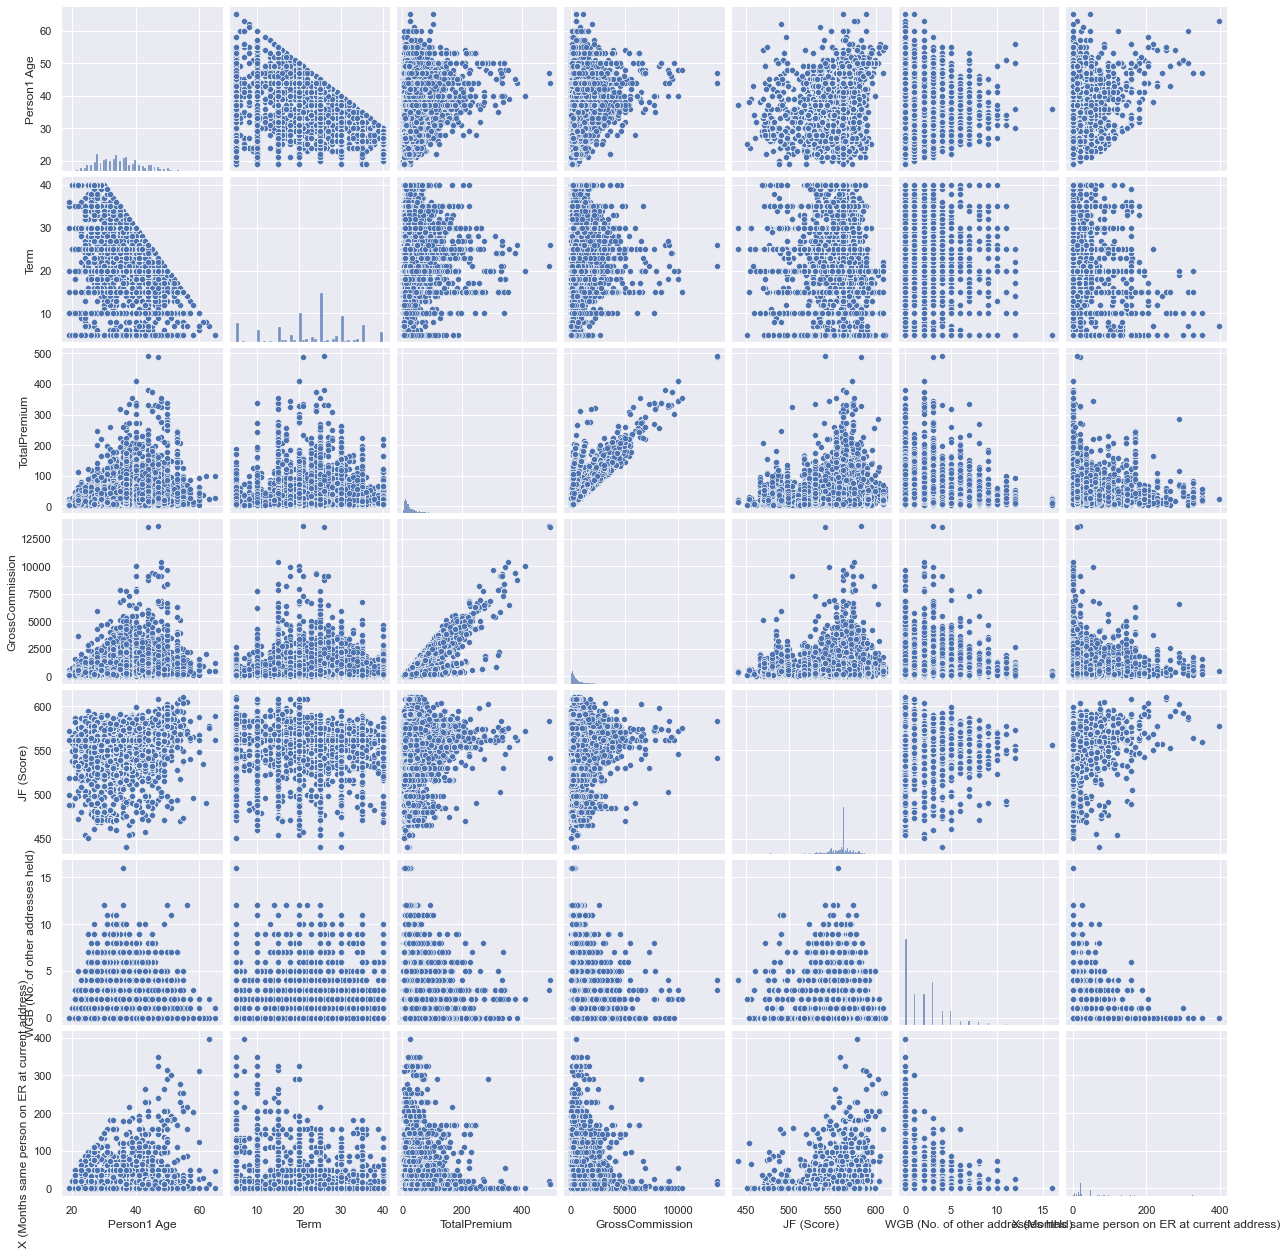

In [50]:
# Zooming the scatter plot
sns.set()
features_scatterplot = ['Person1 Age', 'Term', 'TotalPremium', 'GrossCommission', 'JF (Score)', 'WGB (No. of other addresses held)', 'X (Months same person on ER at current address)' ]
sns.pairplot(quotes_improved[features_scatterplot], size = 2.5)
plt.show()

In [51]:
# Checking the data
quotes_improved

,CampaignCode,Product1,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,JF (Score),GC (Match Status),...,W (Level ER match current address),X (Months same person on ER at current address),BF (Household composition at current address),NOB (Property group),URB (Income group),WRB (Finance Group - CCJs),LSB (Regional banded house price band),UDB (Searches detected),BB (Number of CCJs),Sale
0,BS9R,LFAS,0,0,51,5,19.05,279.75,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,0
1,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
2,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
3,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
4,BS09,LFAS,0,0,34,26,36.22,1116.22,477,S1,...,S2,0.0,G,17,7,6,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35973,BS9M,LFAS,0,0,27,40,6.72,151.84,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0
35974,BS9M,LFAS,0,0,27,40,6.72,151.84,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0
35975,BS9M,LFAS,0,0,27,40,6.72,151.84,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0
35976,BS9L,LFAS,0,0,27,40,6.99,177.34,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0


## Outliers

In [52]:
# Deleting outliers
quotes_improved = quotes_improved.drop(quotes_improved[(quotes_improved['GrossCommission'] > 11000)].index)
quotes_improved.index=range(0,len(quotes_improved))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


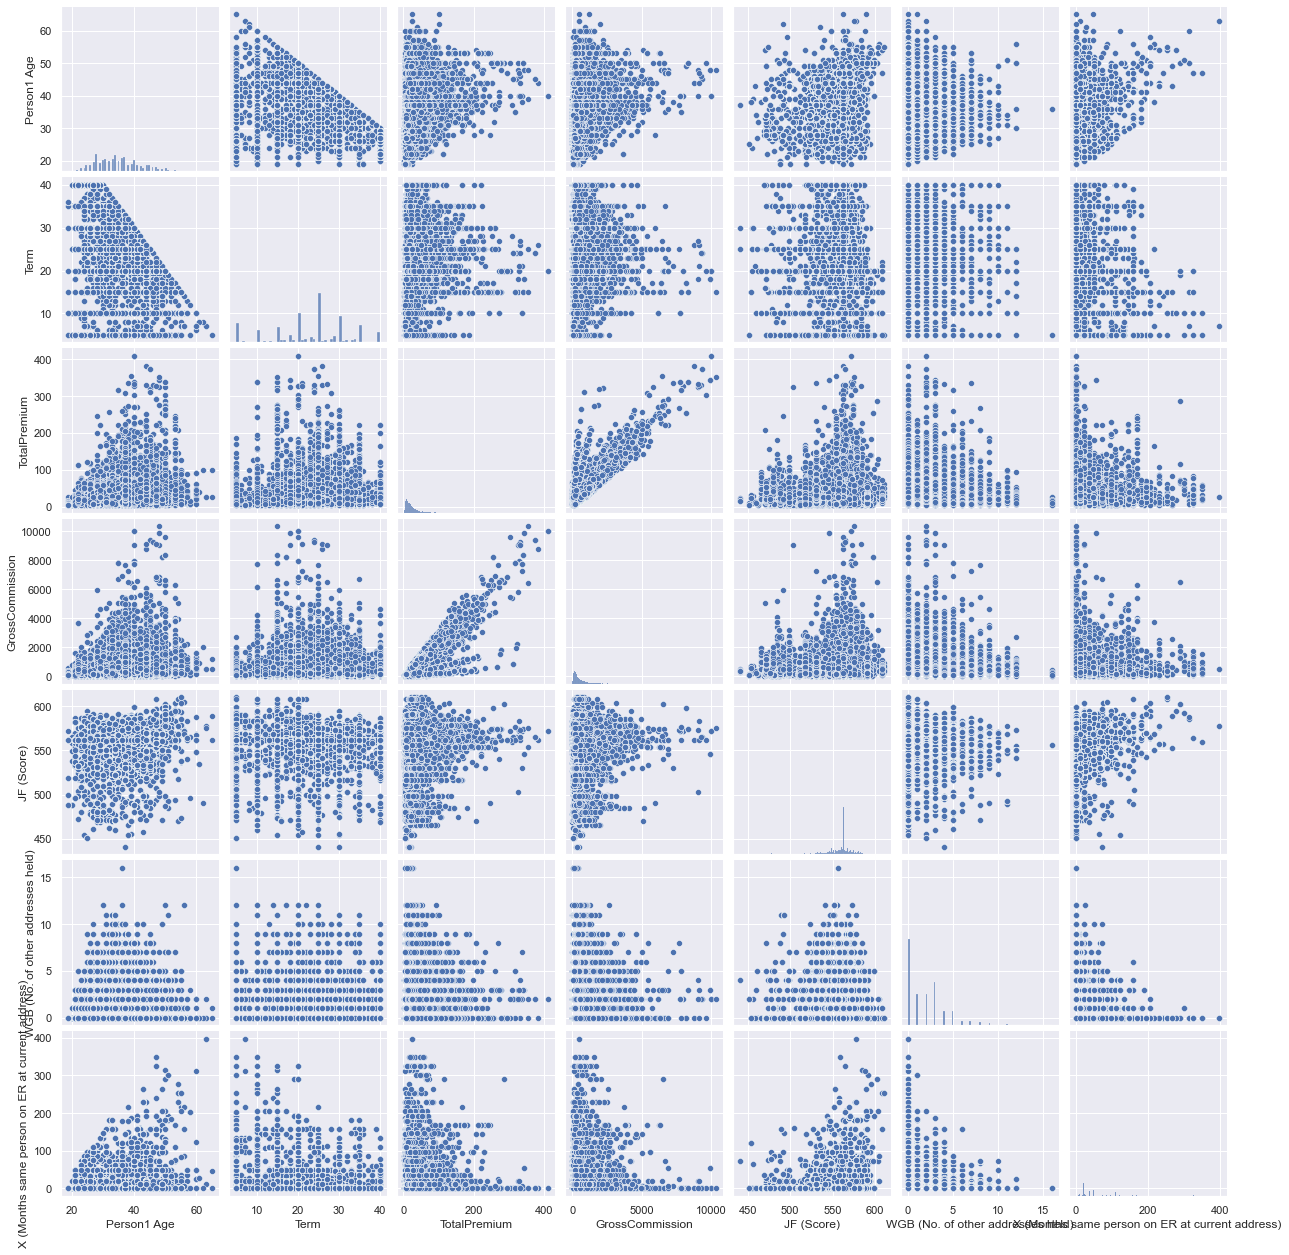

In [53]:
# Checking scatter plot after removing the outliers
sns.set()
features_scatterplot = ['Person1 Age', 'Term', 'TotalPremium', 'GrossCommission', 'JF (Score)', 'WGB (No. of other addresses held)', 'X (Months same person on ER at current address)' ]
sns.pairplot(quotes_improved[features_scatterplot], size = 2.5)
plt.show()

In [54]:
# Checking the data after the removal of outliers
quotes_improved

,CampaignCode,Product1,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,JF (Score),GC (Match Status),...,W (Level ER match current address),X (Months same person on ER at current address),BF (Household composition at current address),NOB (Property group),URB (Income group),WRB (Finance Group - CCJs),LSB (Regional banded house price band),UDB (Searches detected),BB (Number of CCJs),Sale
0,BS9R,LFAS,0,0,51,5,19.05,279.75,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,0
1,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
2,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
3,BS9R,LFAS,0,0,51,5,11.48,134.20,599,I1,...,P1,193.0,B,13,4,1,5.0,0.0,0.0,1
4,BS09,LFAS,0,0,34,26,36.22,1116.22,477,S1,...,S2,0.0,G,17,7,6,5.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35971,BS9M,LFAS,0,0,27,40,6.72,151.84,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0
35972,BS9M,LFAS,0,0,27,40,6.72,151.84,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0
35973,BS9M,LFAS,0,0,27,40,6.72,151.84,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0
35974,BS9L,LFAS,0,0,27,40,6.99,177.34,554,I1,...,P2,111.0,E,16,5,6,10.0,1.0,0.0,0


In [55]:
# Checking again for any missing values
quotes_improved.isna().sum()

CampaignCode                                       0
Product1                                           0
Person1 smoker                                     0
Joint?                                             0
Person1 Age                                        0
Term                                               0
TotalPremium                                       0
GrossCommission                                    0
JF (Score)                                         0
GC (Match Status)                                  0
WGB (No. of other addresses held)                  0
W (Level ER match current address)                 0
X (Months same person on ER at current address)    0
BF (Household composition at current address)      0
NOB (Property group)                               0
URB (Income group)                                 0
WRB (Finance Group - CCJs)                         0
LSB (Regional banded house price band)             0
UDB (Searches detected)                       

## Encoding

In [56]:
# Importing one hot encoder library.
from sklearn.preprocessing import OneHotEncoder

# creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

In [57]:
# Passing categorical variable columns
encoder_data = pd.DataFrame(encoder.fit_transform(quotes_improved[['Product1', 'GC (Match Status)', 'W (Level ER match current address)', 'BF (Household composition at current address)', 'CampaignCode']]).toarray())

# Assining feature columns.
encoder_data.columns = encoder.get_feature_names(['Product1', 'GC (Match Status)', 'W (Level ER match current address)', 'BF (Household composition at current address)', 'CampaignCode'])
# merge with main data on key values
quotes_encoded = (quotes_improved.join(encoder_data)).drop(columns = ['Product1', 'GC (Match Status)', 'W (Level ER match current address)', 'BF (Household composition at current address)', 'CampaignCode'], axis=1)
# Checking the output
quotes_encoded

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),NOB (Property group),...,CampaignCode_BS9I,CampaignCode_BS9L,CampaignCode_BS9M,CampaignCode_BS9R,CampaignCode_BS9S,CampaignCode_BS9W,CampaignCode_BS9Y,CampaignCode_BSC5,CampaignCode_BSFF,CampaignCode_BSPP
0,0,0,51,5,19.05,279.75,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,51,5,11.48,134.20,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,51,5,11.48,134.20,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,51,5,11.48,134.20,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,34,26,36.22,1116.22,477,0.0,0.0,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35971,0,0,27,40,6.72,151.84,554,1.0,111.0,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35972,0,0,27,40,6.72,151.84,554,1.0,111.0,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35973,0,0,27,40,6.72,151.84,554,1.0,111.0,16,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35974,0,0,27,40,6.99,177.34,554,1.0,111.0,16,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
# Cheking the data types after encoder
for i in range(len(quotes_encoded.dtypes)):
    if quotes_encoded.dtypes[i] not in ['int64', 'float64']:
        print(i, quotes_encoded.dtypes[i])

9 object
10 object
11 object


In [59]:
# Checking the column
quotes_encoded.iloc[:,9]

0        13
1        13
2        13
3        13
4        17
         ..
35971    16
35972    16
35973    16
35974    16
35975    16
Name: NOB (Property group), Length: 35976, dtype: object

In [60]:
# Converting to int
quotes_encoded['NOB (Property group)'] = quotes_encoded['NOB (Property group)'].astype('int64')

In [61]:
# Checking the column
quotes_encoded.iloc[:,10]

0        4
1        4
2        4
3        4
4        7
        ..
35971    5
35972    5
35973    5
35974    5
35975    5
Name: URB (Income group), Length: 35976, dtype: object

In [62]:
# Converting to int
quotes_encoded['URB (Income group)'] = quotes_encoded['URB (Income group)'].astype('int64')

In [63]:
# Checking the column
quotes_encoded.iloc[:,11]

0        1
1        1
2        1
3        1
4        6
        ..
35971    6
35972    6
35973    6
35974    6
35975    6
Name: WRB (Finance Group - CCJs), Length: 35976, dtype: object

In [64]:
# Converting to int
quotes_encoded['WRB (Finance Group - CCJs)'] = quotes_encoded['WRB (Finance Group - CCJs)'].astype('int64')

In [65]:
# Checking the data
quotes_encoded.head()

,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),NOB (Property group),...,CampaignCode_BS9I,CampaignCode_BS9L,CampaignCode_BS9M,CampaignCode_BS9R,CampaignCode_BS9S,CampaignCode_BS9W,CampaignCode_BS9Y,CampaignCode_BSC5,CampaignCode_BSFF,CampaignCode_BSPP
0,0,0,51,5,19.05,279.75,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,51,5,11.48,134.20,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,51,5,11.48,134.20,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,51,5,11.48,134.20,599,0.0,193.0,13,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,34,26,36.22,1116.22,477,0.0,0.0,17,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Making a copy 
quotes_encoded_complete = quotes_encoded.copy()

## Splitting the data

In [67]:
# Separating target variables
output = quotes_encoded['Sale']

# Retaining column names
column_names = quotes_encoded.columns

# Removing target variable from the rest of the data.
quotes_encoded = quotes_encoded.drop(columns = ['Sale'], axis = 1)

# Splitting the data
quotes_encoded_train, quotes_encoded_test, quotes_encoded_train_output, quotes_encoded_test_output = train_test_split(quotes_encoded, output, test_size=0.2, random_state=30)

In [68]:
quotes_encoded_train_output.value_counts()

0    25941
1     2839
Name: Sale, dtype: int64

<AxesSubplot:title={'center':'Target Variable - Sale'}, ylabel='Sale'>

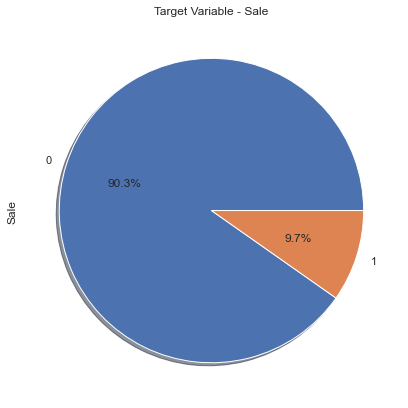

In [69]:
# Pie chart for output data.
quotes_encoded_complete.groupby('Sale')["Sale"].count().plot(kind="pie",autopct='%1.1f%%',shadow=True,figsize=(7,7),title="Target Variable - Sale")

## Sampling of the data

As the dataset classes are imbalanced applying SMOTE to balance the dataset. By up samplig the minority class.

In [70]:
# Import SMOTE
from imblearn.over_sampling import SMOTE

# Resample the minority class
sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_resample(quotes_encoded_train, quotes_encoded_train_output)
oversampled_train = pd.concat([ pd.DataFrame(oversampled_trainX),pd.DataFrame(oversampled_trainY)], axis=1)
oversampled_train.columns = column_names

In [71]:
oversampled_train.shape

(51882, 69)

In [72]:
oversampled_trainY.value_counts()

0    25941
1    25941
Name: Sale, dtype: int64

# Modeling

In [73]:
# Function for fitting the model , calculating output and generating f1_sore.

def fitting_f1_prediction(model):
    
    # Fitting the given model with the data.
    model.fit(oversampled_trainX, oversampled_trainY)
    
    # calculating the predictions
    output_predicted = model.predict(quotes_encoded_test)
    
    # Printing the Accuracy of the model.
    print("f1_score: ", f1_score(quotes_encoded_test_output, output_predicted))
    
    # Returning the fittted model
    return model

In [74]:
# Intitialising the decision tree classifier
Dt_clf = DecisionTreeClassifier()

# Calculating the f1_score of the decision tree classifier
Dt_clf =fitting_f1_prediction(Dt_clf)

f1_score:  0.7747035573122529


In [76]:
# Initialising svm classifier.
svm_clf = svm.SVC()

# Calculating the f1_score of the svm model.
svm_clf = fitting_f1_prediction(svm_clf)

f1_score:  0.20834859025997804


In [77]:
# Initialising knn model.
knn_clf = KNeighborsClassifier(n_neighbors = 7)  

# Calculating f1_score of the knn model
knn_clf = fitting_f1_prediction(knn_clf)

f1_score:  0.506108202443281


In [78]:
# Initialising Logistic regression model.
lr_clf = LogisticRegression()

# Calculating the f1_score of the model
lr_clf = fitting_f1_prediction(lr_clf)

f1_score:  0.20679012345679013


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [79]:
# instantiating RandomForestClassifier
rf_clf = RandomForestClassifier()

# Calculating the f1_score of the random forest classifier
rf_clf = fitting_f1_prediction(rf_clf)

f1_score:  0.8113590263691683


In [80]:
# instantiate the classifier
gbt_clf = GradientBoostingClassifier(n_estimators = 300,max_depth=1,subsample=0.8,max_features=0.2,random_state=42)

# Calculating f1_score of the model
gbt_clf = fitting_f1_prediction(gbt_clf)

f1_score:  0.2682170542635659


#### 'Random Forest' is the best model for this problem

# Clustering

In [81]:
# Importing the library
from kmodes.kprototypes import KPrototypes
oversampled_train_array = oversampled_train.values

In [82]:
categorical_index = list(range(0,6))
categorical_index

[0, 1, 2, 3, 4, 5]

In [83]:
# Plotting the elbow curve
def plot_elbow_curve(start, end, data):
    no_of_clusters = list(range(start, end+1))
    cost_values = []
    # Iterating through clusters
    for k in no_of_clusters:
        print(k)
        test_model = KPrototypes(n_clusters=k, init='Huang', random_state=42)
        test_model.fit_predict(data, categorical=categorical_index)
        cost_values.append(test_model.cost_)
        print(test_model.cost_)
    sns.set_theme(style='whitegrid', palette='bright', font_scale=1.2)
    plt.figure(figsize=(15, 7))
    ax = sns.lineplot(x=no_of_clusters, y=cost_values, marker = "o", dashes=False)
    ax.set_title('Elbow curve', fontsize=18)
    ax.set_xlabel('No of clusters', fontsize=14)
    ax.set_ylabel('Cost', fontsize=14)
    ax.set(xlim=(start-0.1, end+0.1))
    plt.plot()

2
57406098.8001647
3
43037259.11445301
4
32510864.060202852
5
26796696.30003587
6
22633269.881373744
7
20627514.41609091
8
19411341.08645644


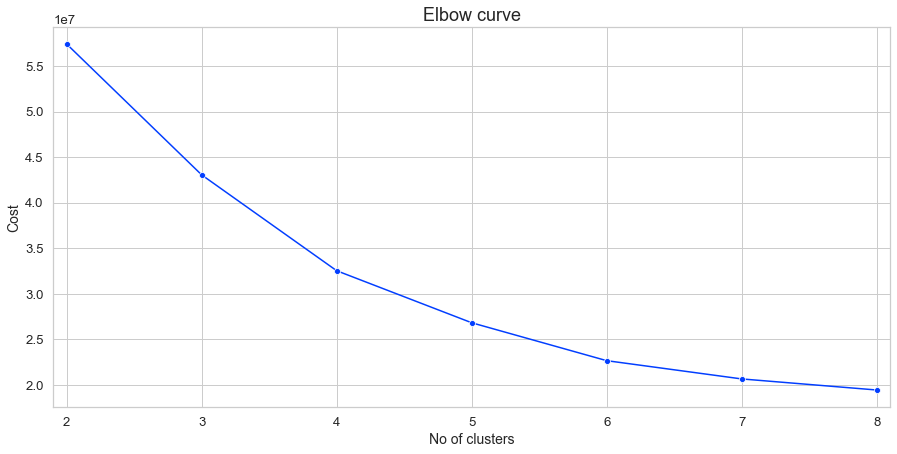

In [84]:
 plot_elbow_curve(2,8,oversampled_train_array)

In [85]:
# By Elbow curve we have taken cluster number as 4. Because the curve is slightly bent over there.
model_4 = KPrototypes(n_clusters=4, init='Huang', random_state=42, n_jobs=-1)

# Fitting and calculating the group
model_4.fit_predict(oversampled_train_array, categorical=categorical_index)

# Attaching group number to the main model
oversampled_train['labels4'] = model_4.labels_

In [86]:
# Checking the dataset
oversampled_train.head()

,Person1 smoker,Joint?,Person1 Age,Term,TotalPremium,GrossCommission,JF (Score),WGB (No. of other addresses held),X (Months same person on ER at current address),NOB (Property group),...,CampaignCode_BS9L,CampaignCode_BS9M,CampaignCode_BS9R,CampaignCode_BS9S,CampaignCode_BS9W,CampaignCode_BS9Y,CampaignCode_BSC5,CampaignCode_BSFF,CampaignCode_BSPP,labels4
0,0,0,29,40,8.15,226.61,551,2.0,21.0,19,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
1,0,0,25,35,15.54,367.59,565,0.0,0.0,12,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,3
2,0,0,30,10,4.98,116.16,562,0.0,0.0,11,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
3,1,0,36,20,36.95,863.45,546,2.0,21.0,11,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,3
4,1,0,36,25,29.80,694.28,565,2.0,0.0,13,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0,3


In [87]:
# Checking groups
oversampled_train['labels4'].value_counts()

3    34940
2     8357
0     6305
1     2280
Name: labels4, dtype: int64

# Conclusion

Successfully implemented modeling. Observed 'Random Forest' gives the best results. Tried other models as well but other models performed poorly. So Choosen 'Random Forest' model as the best performing model.

Clustered given data into groups using clustering algorithm.

# Future Scope

Produce an API so other people can use model.

Implement parameter tuning for the models. 

Dockerise the model.

Explore more models.

Explore more options for clustering.
